In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
def grafica(times, I, T,NT,R, S, M):
    
    #Esta funcịón grafica para un tiempo determinados los valores de las listas I, T,NT,R, S y M
  
    
    plt.figure()
    plt.plot(times, I, 'r', label = 'Infectados')
    plt.plot(times, T, 'c', label = 'Tratados')
    plt.plot(times, NT, 'y', label = 'No tratados')
    plt.plot(times, R, 'g', label = 'Recuperados')
    plt.plot(times, S, 'm', label = 'Susceptibles')
    plt.plot(times, M, 'k', label = 'Muertos')
    plt.legend()
    plt.show()
    
def vari(beta,gamma,alpha,rho,Capacidad,R,I,S,T,NT,M,dt):
    
    ##Esta función define los comportamientos que tienen cada variable R,I,S,T,NT y M
    
    
    
    if I <= Capacidad:
        T_new = I
        NT_new= NT
    else :
        T_new= Capacidad
        NT_new = I - Capacidad
    dR = (gamma*I)*dt
    R_new = R + dR
    dS = (-beta*I*S)*dt
    S_new = S + dS
    dM = ((alpha*T)+(rho*NT))*dt
    M_new = M + dM
    I_new = 1 -S_new - R_new - M_new 
    return R_new, S_new, I_new, T_new, NT_new, M_new

def SIRM(beta, gamma, alpha, rho, Capacidad,tmax, dt):
    I = [0.2]
    T = [0]
    NT = [0]   
    R = [0]
    S = [0.8]
    M = [0]
    times = np.arange(0, tmax+dt, dt)
    
    for i in range(times.size-1):
        R_new, S_new, I_new, T_new, NT_new, M_new = vari(beta,gamma, alpha, rho, Capacidad,R[i],I[i],S[i],T[i],NT[i],M[i],dt)
        R.append(R_new)
        S.append(S_new)
        I.append(I_new)
        T.append(T_new)
        NT.append(NT_new)
        M.append(M_new)
    grafica(times, I,T,NT, R, S, M)

Como ya vimos, hay muchos parametros a considerar, veremos que sucede al variar algunos de estos parametros y otros hacerlos constantes.

Empezaremos haciendo constante la Capacidad del sistema de salud.

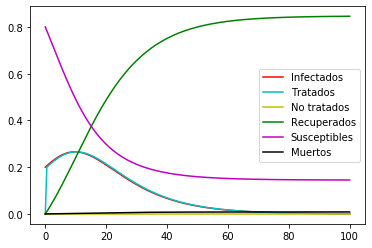

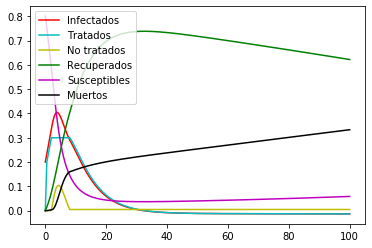

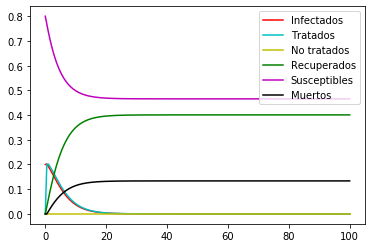

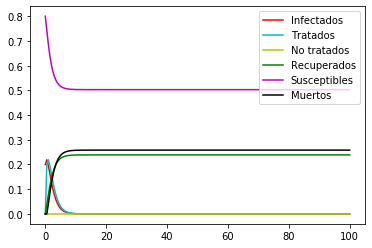

In [44]:
SIRM(0.2,0.1,0.001,0.4,0.3,100,0.5)
SIRM(0.6,0.15,0.01,0.36,0.3,100,0.5)
SIRM(0.4,0.3,0.1,0.45,0.3,100,0.5)
SIRM(0.7,0.37,0.4,0.8,0.3,100,0.5)

Vemos que al dejar constante solamente el parametro de la Capacidad, no podemos concluir mucho.


Veamos ahora si dejamos constante tres parametros (todos los parametros del sistema de salud). Empezaremos suponiendo que la capacidad de atencion del sistema de salud para esta pandemia es del 35% de la poblacion, ademas, supondremos que entre mayor sea la capacidad de atencion menor va a ser la tasa de mortalidad de los pacientes tratados. Pondremos una tasa de mortalidad del 40% de las personas que no son atendidas en un centro de salud.

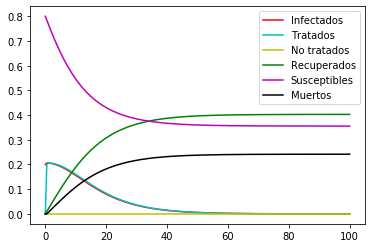

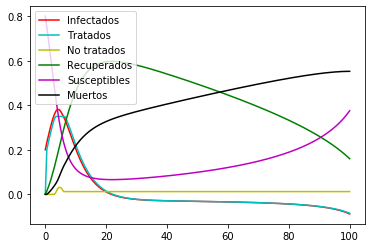

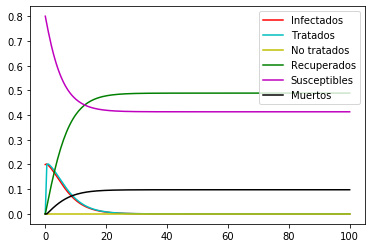

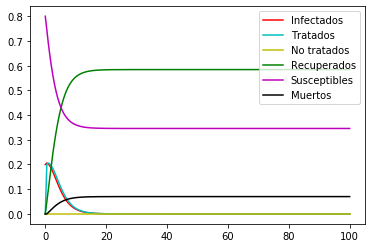

In [57]:
SIRM(0.2,0.1,0.06,0.4,0.35,100,0.5)
SIRM(0.6,0.15,0.06,0.4,0.35,100,0.5)
SIRM(0.4,0.3,0.06,0.4,0.35,100,0.5)
SIRM(0.7,0.5,0.06,0.4,0.35,100,0.5)

Ahora, seguiremos teniendo los mismos parametros constantes, en el mismo valor y miraremos que sucede al cambiar las tasas de infeccion y de recuperacion de tal manera que la razon entre ambas tasas es igual.

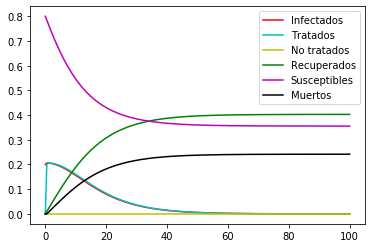

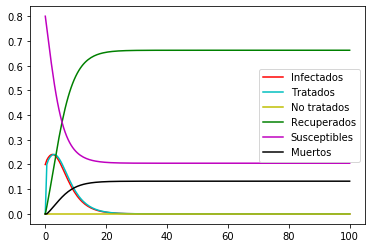

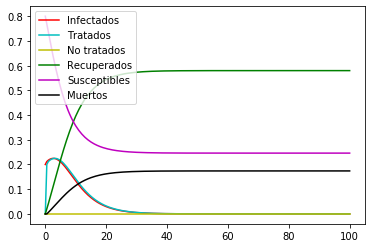

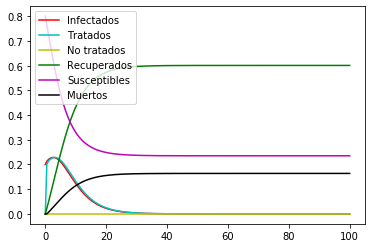

In [54]:
SIRM(0.2,0.1,0.06,0.4,0.35,100,0.5)
SIRM(0.6,0.3,0.06,0.4,0.35,100,0.5)
SIRM(0.4,0.2,0.06,0.4,0.35,100,0.5)
SIRM(0.44,0.22,0.06,0.4,0.35,100,0.5)

Haremos que la diferencia entre ambas tasas(infeccion y recuperacion) sean iguales, de un factor de 0.3

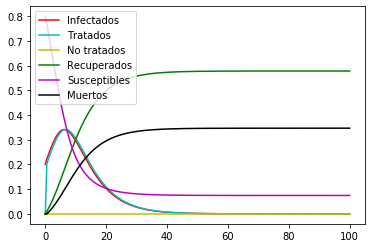

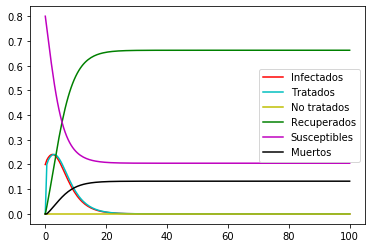

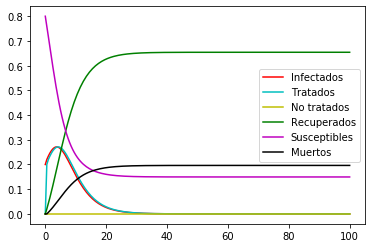

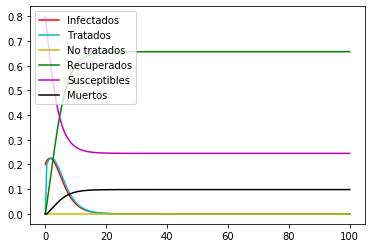

In [47]:
SIRM(0.4,0.1,0.06,0.4,0.35,100,0.5)
SIRM(0.6,0.3,0.06,0.4,0.35,100,0.5)
SIRM(0.5,0.2,0.06,0.4,0.35,100,0.5)
SIRM(0.7,0.4,0.06,0.4,0.35,100,0.5)

Aumentaremos la diferencia entre la tasa de infeccion y la tasa de recuperacion, ahora su diferencia es de 0.4

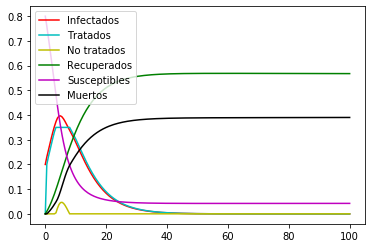

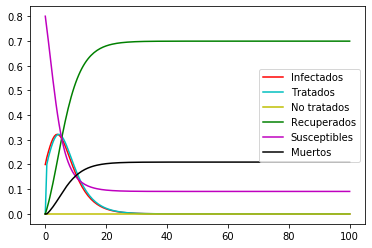

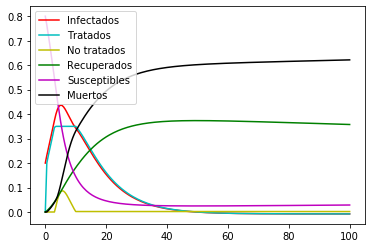

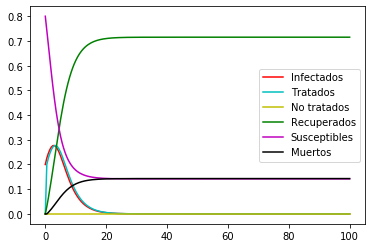

In [48]:
SIRM(0.5,0.1,0.06,0.4,0.35,100,0.5)
SIRM(0.6,0.2,0.06,0.4,0.35,100,0.5)
SIRM(0.45,0.05,0.06,0.4,0.35,100,0.5)
SIRM(0.7,0.3,0.06,0.4,0.35,100,0.5)